# Полиномиальная регрессия. 
* Для улучшения точности, можно добавить полиномы более высоких степеней.

* Полиномы помогут решить 2 задачи: 
1. Нелинейные связи между отдельным признаком и целевой переменной.
2. Взаимодействие (зависимости) между признаками.

---
### Т.е. в итоге он преобразует признаки на полиномы. 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
pol_converter = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
# Не выполняет обучение, только выполняет анализ признаков. 
pol_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = pol_converter.transform(X)

In [9]:
poly_features.shape

(200, 9)

In [10]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [11]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
230.1*37.8

8697.779999999999

In [13]:
37.8*69.2

2615.7599999999998

In [14]:
# A^2 
230.1**2

52946.009999999995

In [15]:
# вместо 2-х шагов можно сделать единный 
pol_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
# выполняем обучение на полиномах вместо изначальных признаков
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.49
RMSE: 0.66


MSE: 2.30

RMSE: 1.52

MAE: 1.21

--- 
### Сравнение bias-variance разных полиномов. 

1. Создать различные степени полинома.
2. Разбить данные на обуч-тест.
3. Создать новую модель и обучить.
4. Сохранить RMSE для обуч. и тест. данных.
5. Нарисовать график - ошибка по степеням полинма.

In [18]:
train_rmse_error = [] # ошибки разных моделей. 
test_rmse_error = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(rmse_train)
    test_rmse_error.append(rmse_test)

In [19]:
train_rmse_error

[np.float64(1.734594124329376),
 np.float64(0.5879574085292233),
 np.float64(0.4339344356902068),
 np.float64(0.3517083688399347),
 np.float64(0.25093429694811553),
 np.float64(0.2095372870366497),
 np.float64(0.2204686011421281),
 np.float64(0.2714978811502994),
 np.float64(0.5132043099216381)]

In [20]:
test_rmse_error

[np.float64(1.5161519375993877),
 np.float64(0.6646431757268958),
 np.float64(0.580328682522652),
 np.float64(0.5077742648695357),
 np.float64(2.5758251972979704),
 np.float64(9.871422796209963),
 np.float64(41.32999073319802),
 np.float64(3103.1636448381573),
 np.float64(12768.34948166156)]

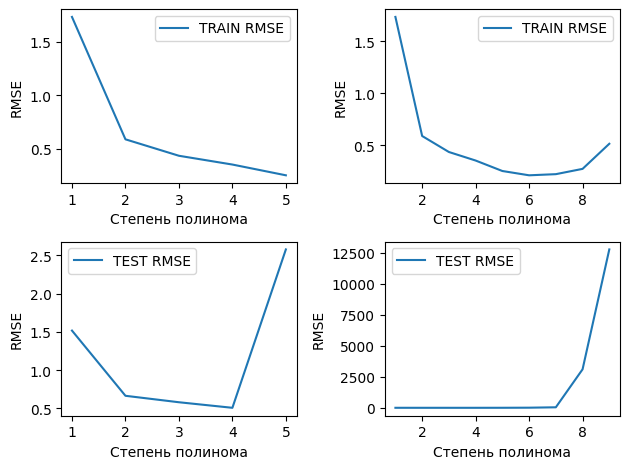

In [21]:
fig, axes = plt.subplots(2,2)

axes[0][0].plot(range(1,6), train_rmse_error[:5], label='TRAIN RMSE')
axes[0][0].set_xlabel('Степень полинома')
axes[0][0].set_ylabel('RMSE')
axes[0][0].legend()

axes[0][1].plot(range(1,10), train_rmse_error, label='TRAIN RMSE')
axes[0][1].set_xlabel('Степень полинома')
axes[0][1].set_ylabel('RMSE')
axes[0][1].legend()

axes[1][0].plot(range(1,6), test_rmse_error[:5], label='TEST RMSE')
axes[1][0].set_xlabel('Степень полинома')
axes[1][0].set_ylabel('RMSE')
axes[1][0].legend()

axes[1][1].plot(range(1,10), test_rmse_error, label='TEST RMSE')
axes[1][1].set_xlabel('Степень полинома')
axes[1][1].set_ylabel('RMSE')
axes[1][1].legend()

plt.tight_layout()

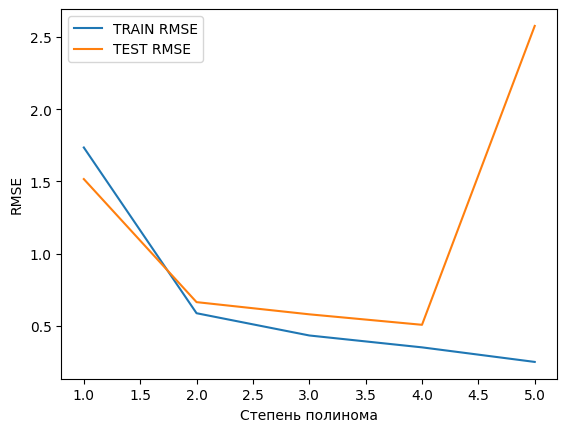

In [22]:
plt.figure()
plt.plot(range(1,6), train_rmse_error[:5], label='TRAIN RMSE')
plt.plot(range(1,6), test_rmse_error[:5], label='TEST RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend();

---
### Сохранение и внедрение модели. 

In [23]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
full_converted_X = final_poly_converter.fit_transform(X)

final_model = LinearRegression()
final_model.fit(full_converted_X,y)

LinearRegression()

In [33]:
x_val = np.random.rand(200,19)
y_val = final_model.predict(x_val)

mse = np.sqrt(mean_squared_error(y,y_val))
mse


np.float64(11.277939191877115)

In [25]:
from joblib import dump, load 
dump(final_model,'Final_Poly_Model.joblib')
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

--- 
### Предсказание на новых данных 

In [26]:
loaded_converter = load('final_poly_converter.joblib')
loaded_model = load('final_poly_model.joblib')

campaign = [[149,22,12]]

transformed_data = loaded_converter.transform(campaign)
loaded_model.predict(transformed_data)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14.64501014])